# Tasks for laboratory assignment 3

In [8]:
# imports section

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor


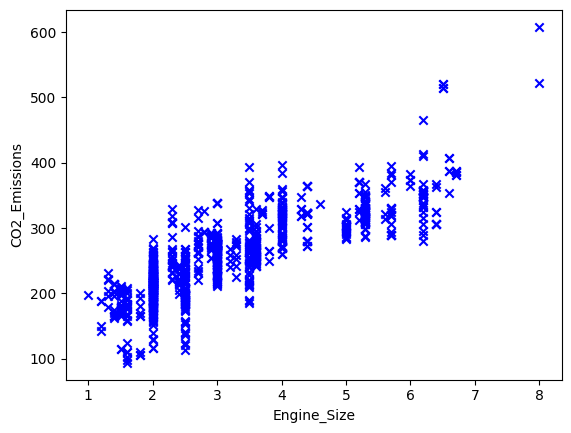

In [9]:
def build_plot(file_path, x, y):
    data = pd.read_csv(file_path)
    plt.scatter(data[x], data[y], c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt

build_plot('resources/CO2_emission.csv', 'Engine_Size', 'CO2_Emissions').show()


In [10]:
def extract_texts_from_file(file_path):
    """
    Extract the text data from the csv file

    Args:
        file_path (str): Relative location of the csv file in the project.

    Returns:
        list: The list of texts as strings.
    """
    df = pd.read_csv(file_path)
    return df.to_dict('records')

data = extract_texts_from_file('resources/heart.csv')
print(data[:50])

[{'age': 63, 'sex': 1, 'cp': 3, 'trtbps': 145, 'chol': 233, 'fbs': 1, 'restecg': 0, 'thalachh': 150, 'exng': 0, 'oldpeak': 2.3, 'slp': 0, 'caa': 0, 'thall': 1, 'output': 1}, {'age': 37, 'sex': 1, 'cp': 2, 'trtbps': 130, 'chol': 250, 'fbs': 0, 'restecg': 1, 'thalachh': 187, 'exng': 0, 'oldpeak': 3.5, 'slp': 0, 'caa': 0, 'thall': 2, 'output': 1}, {'age': 41, 'sex': 0, 'cp': 1, 'trtbps': 130, 'chol': 204, 'fbs': 0, 'restecg': 0, 'thalachh': 172, 'exng': 0, 'oldpeak': 1.4, 'slp': 2, 'caa': 0, 'thall': 2, 'output': 1}, {'age': 56, 'sex': 1, 'cp': 1, 'trtbps': 120, 'chol': 236, 'fbs': 0, 'restecg': 1, 'thalachh': 178, 'exng': 0, 'oldpeak': 0.8, 'slp': 2, 'caa': 0, 'thall': 2, 'output': 1}, {'age': 57, 'sex': 0, 'cp': 0, 'trtbps': 120, 'chol': 354, 'fbs': 0, 'restecg': 1, 'thalachh': 163, 'exng': 1, 'oldpeak': 0.6, 'slp': 2, 'caa': 0, 'thall': 2, 'output': 1}, {'age': 57, 'sex': 1, 'cp': 0, 'trtbps': 140, 'chol': 192, 'fbs': 0, 'restecg': 1, 'thalachh': 148, 'exng': 0, 'oldpeak': 0.4, 'slp': 

## CO2 emissions

Process file `CO2_emission.csv`. Build a model, that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

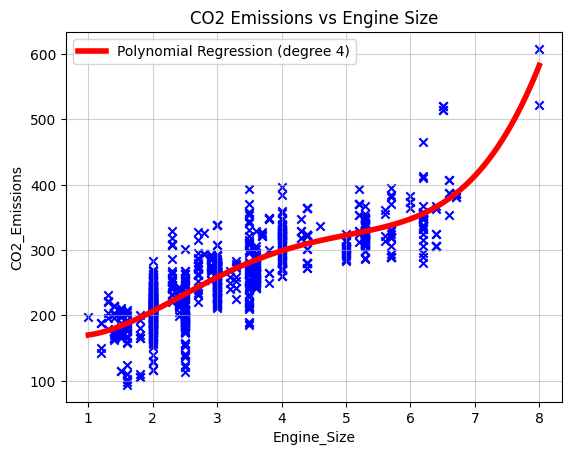

[np.float64(198.97238447802283),
 0.0,
 -83.53403051636673,
 67.6487431172746,
 -13.857801595517955,
 0.9320101257867037]

In [11]:
def CO2_emissions(data):
    """
    Build a model that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

    Args:
        data: CO2 emissions data.

    Returns:
        list: The list of model theta parameters.
    """
    df = pd.DataFrame(data)
    
    X = df[['Engine_Size']].values
    y = df['CO2_Emissions'].values
    
    poly_features = PolynomialFeatures(degree=4)
    X_poly = poly_features.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_pred_poly = poly_features.transform(X_pred)
    y_pred = model.predict(X_pred_poly)
    
    plot = build_plot('resources/CO2_emission.csv', 'Engine_Size', 'CO2_Emissions')
    plot.plot(X_pred, y_pred, 'r-', linewidth=4, label='Polynomial Regression (degree 4)')
    plot.legend()
    plot.title('CO2 Emissions vs Engine Size')
    plot.grid(True, alpha=0.6)
    plot.show()
    
    return [model.intercept_] + model.coef_.tolist()

data = extract_texts_from_file('resources/CO2_emission.csv')
CO2_emissions(data)

## Ice Cream Sales

Process file `ice_cream_selling_data.csv`. Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

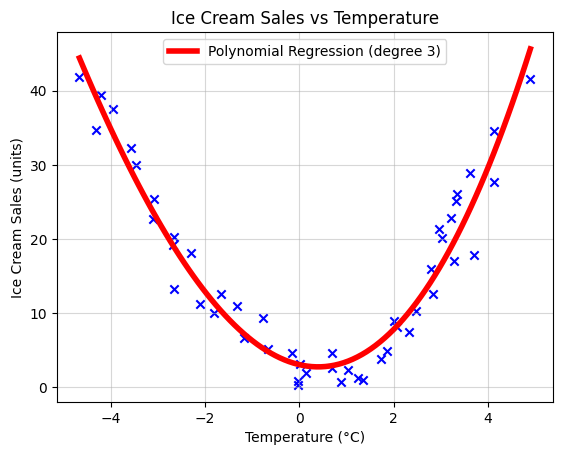

[np.float64(3.061373017339159),
 0.0,
 -1.4809035312338636,
 1.824312099540442,
 0.05141274165992993]

In [12]:
def ice_cream_selling(data):
    """
    Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

    Args:
        data: ice cream sales data.

    Returns:
        list: The list of model theta parameters.
    """
    df = pd.DataFrame(data)
    
    temp_col = df.columns[0]  
    sales_col = df.columns[1]  
    
    X = df[[temp_col]].values
    y = df[sales_col].values
    
    poly_features = PolynomialFeatures(degree=3)
    X_poly = poly_features.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_pred_poly = poly_features.transform(X_pred)
    y_pred = model.predict(X_pred_poly)
    
    plot = build_plot('resources/ice_cream_selling_data.csv', temp_col, sales_col)
    plot.plot(X_pred, y_pred, 'r-', linewidth=4, label='Polynomial Regression (degree 3)')
    plot.legend()
    plot.title('Ice Cream Sales vs Temperature')
    plot.grid(True, alpha=0.5)
    plot.show()
    
    return [model.intercept_] + model.coef_.tolist() 

data = extract_texts_from_file('resources/ice_cream_selling_data.csv')
ice_cream_selling(data)

## Electric Power Consumption

Process file `powerconsumption.csv`. Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

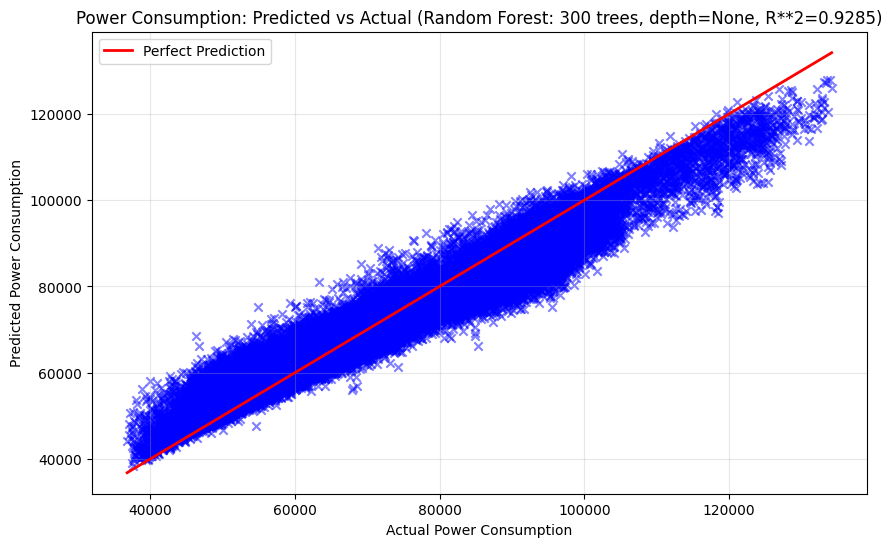

[0.5124618021051082, 0.31479275933432566, 0.17274543856056618]

In [13]:
def power_consumption(data):
    """
    Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. 
    Visualize model on a plot.

    Args:
        data: power consumption data.

    Returns:
        list: The list of model theta parameters.
    """
    df = pd.DataFrame(data)

    X = df[['Temperature', 'Humidity', 'WindSpeed']].values
    y = df['PowerConsumption_Zone1'].values + df['PowerConsumption_Zone2'].values + df['PowerConsumption_Zone3'].values
    
    model = RandomForestRegressor(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1)
    model.fit(X, y)
    
    y_pred = model.predict(X)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.5, c='blue', marker='x')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r-', linewidth=2, label='Perfect Prediction')
    plt.xlabel('Actual Power Consumption')
    plt.ylabel('Predicted Power Consumption')
    plt.title('Power Consumption: Predicted vs Actual (Random Forest: 300 trees, depth=None, R**2=0.9285)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    feature_importances = model.feature_importances_.tolist()
    return feature_importances

data = extract_texts_from_file('resources/powerconsumption.csv')
power_consumption(data)

## Heart Conditions Predictions

Process file `heart.csv`. It has the following data:

- age - Age of the patient
- sex - Sex of the patient
- cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- trtbps - Resting blood pressure (in mm Hg)
- chol - Cholestoral in mg/dl fetched via BMI sensor
- fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- thalachh - Maximum heart rate achieved
- oldpeak - Previous peak
- slp - Slope
- caa - Number of major vessels
- thall - Thalium Stress Test result ~ (0,3)
- exng - Exercise induced angina ~ 1 = Yes, 0 = No
- output - Target variable - risk of heart attack - 1 is high chance of heart attack and 0 is low chance.

Use classification model (choose model best fitting model yourself). Choose parameters that would best fit for making a prediction on. Visualize model on a plot.

*Bonus points*: split data into train data and validation data. Validate your model.

Validation Accuracy: 0.8852

Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.89      0.86      0.88        29
   High Risk       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



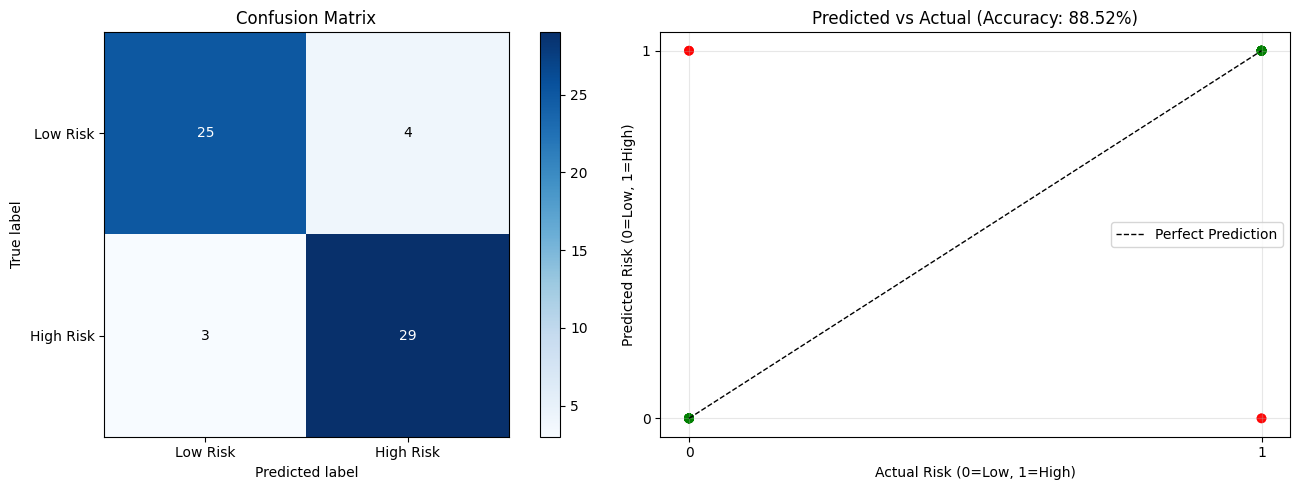

[np.float64(0.8157261795612826),
 -0.004378636081630187,
 -0.635062420775266,
 0.5756266508081015,
 -0.0127523690594752,
 -0.0016467100658550898,
 0.03019885799749314,
 0.2009887091141308,
 0.02174785651319123,
 -0.46469915474136936,
 -0.524185236744262,
 0.33636032450447584,
 -0.5450540030338382,
 -0.5637493549588898]

In [14]:
def heart_classification(data):
    """
    Build a model, that would classify risk category for heart attack. 
    Visualize model on a plot.

    Args:
        data: heart medical data.

    Returns:
        list: The list of model theta parameters.
    """
    df = pd.DataFrame(data)
    
    X = df.drop('output', axis=1).values
    y = df['output'].values
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LogisticRegression(C=0.1, solver='lbfgs', max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_pred)
    print(f'Validation Accuracy: {accuracy:.4f}')
    print(f'\nClassification Report:')
    print(classification_report(y_val, y_pred, target_names=['Low Risk', 'High Risk']))
    
    cm = confusion_matrix(y_val, y_pred)
    
    _, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    im = axes[0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    axes[0].figure.colorbar(im, ax=axes[0])
    axes[0].set(xticks=np.arange(cm.shape[1]),
                yticks=np.arange(cm.shape[0]),
                xticklabels=['Low Risk', 'High Risk'],
                yticklabels=['Low Risk', 'High Risk'],
                title='Confusion Matrix',
                ylabel='True label',
                xlabel='Predicted label')
    
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            axes[0].text(j, i, format(cm[i, j], 'd'),
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")
    
    axes[1].scatter(y_val, y_pred, alpha=0.6, c=['red' if y_val[i] != y_pred[i] else 'green' for i in range(len(y_val))])
    axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Perfect Prediction')
    axes[1].set_xlabel('Actual Risk (0=Low, 1=High)')
    axes[1].set_ylabel('Predicted Risk (0=Low, 1=High)')
    axes[1].set_title(f'Predicted vs Actual (Accuracy: {accuracy:.2%})')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xticks([0, 1])
    axes[1].set_yticks([0, 1])
    
    plt.tight_layout()
    plt.show()
    
    return [model.intercept_[0]] + model.coef_[0].tolist()

data = extract_texts_from_file('resources/heart.csv')
heart_classification(data)

## Additional (extra credit)

There are more files in the `resources` folder. Take a look at the. Visualize data in these files. Choose ML algorithm for building a model and making predictions for new data. Visualize the model.